In [1]:
import os
import pandas as pd
import numpy as np

import joblib
import pickle
from sklearn.inspection import permutation_importance, PartialDependenceDisplay

In [6]:
X_train = pickle.load(open('../data/processed/X_train.sav', 'rb'))
X_test = pickle.load(open('../data/processed/X_test.sav', 'rb'))
y_train = pickle.load(open('../data/processed/y_train.sav', 'rb'))
y_test = pickle.load(open('../data/processed/y_test.sav', 'rb'))
lr_pipe = joblib.load('../models/logistic_regression_pipeline.sav')
rf_pipe = joblib.load('../models/random_forest_pipeline.sav')
knn_pipe = joblib.load('../models/k_nearest_neighbors_pipeline.sav')
xgb_pipe = joblib.load('../models/gradient_boost_pipeline.sav')

In [12]:
r = permutation_importance(
    #knn_pipe,
    #rf_pipe,
    xgb_pipe,
    X_train, 
    y_train,
    n_repeats=5,
    n_jobs=-1,
    random_state=42 #Ensures results can be reproduced by using random generator
)

feature_importances = pd.DataFrame.from_dict(
    {
        'importance_means': r['importances_mean'],
        'importances_std': r['importances_std']
    }, orient='columns'
)
feature_importances.index = X_train.columns

feature_importances.sort_values('importance_means', ascending = False)

,importance_means,importances_std
RIDAGEYR,0.077309,0.001161
INDHHIN2,0.050026,0.001146
PAD680,0.049339,0.000829
RIDRETH3,0.034302,0.000865
MCQ084,0.030865,0.000855
DBQ700,0.027346,0.000299
DPQ020,0.019202,0.001103
CDQ001,0.011434,0.000679
DIQ010,0.011246,0.001066
MCQ080,0.010726,0.000527


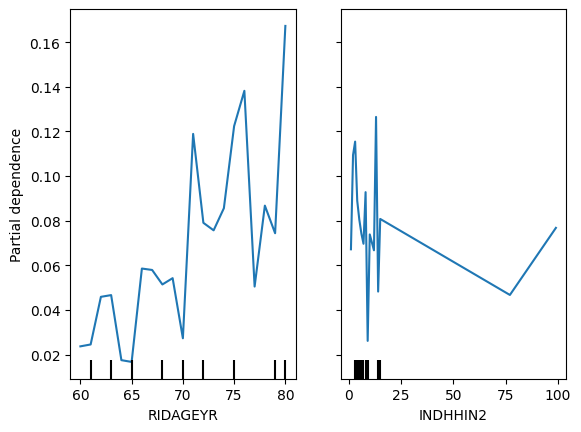

In [11]:
PartialDependenceDisplay.from_estimator(xgb_pipe, X_train.dropna(), features = ['RIDAGEYR', 'INDHHIN2'], target=1)